# Ejercicio 1: OR

In [211]:
import numpy as np
import matplotlib.pyplot as plt

In [212]:
ds_train = np.genfromtxt('icgtp1datos/OR_trn.csv', delimiter=',')
ds_train_size = ds_train.shape[0]

ds_test = np.genfromtxt('icgtp1datos/OR_tst.csv', delimiter=',')
ds_test_size = ds_test.shape[0]

In [213]:
# rand(len(ds['x1'])) - 0.5
# print(w.min(), w.max())

w = np.random.rand(3) - 0.5
N = 20 # Epocas
gamma = 0.001 # Tasa de aprendizaje
nu = 0.05 # Umbral de error

for i in range(N):
    for j in ds_train:
        # Convolución
        y = j[0] * w[1] + j[1] * w[2] - w[0]
        # print('y_c', y)
        # No linealidad
        if (y > 0):
            y = 1
        else:
            y = -1
        # Actualización de pesos
        # print('x1', j[0], 'x2', j[1], 'y', y)
        w = w + np.concatenate([[-1], j[0:2]]) * gamma * (j[2] - y)
    
    errores = 0
    for j in ds_train[np.random.randint(0, 2000, size=200)]:
        # Convolución
        y = j[0] * w[1] + j[1] * w[2] - w[0]
        # No linealidad
        if (y > 0 and 1 != j[2]):
            errores += 1
        elif (y <= 0 and -1 != j[2]):
            errores += 1
    error = (errores/200)
    print(f'Epoca {i}: error = {error}')
    if (error < nu):
        break

print(w/ np.linalg.norm(w))

y_c -0.997581728311322
x1 0.99941 x2 -1.0007 y -1
y_c 0.15614404460820708
x1 -0.99501 x2 1.0201 y 1
y_c -0.07809893048613376
x1 1.0057 x2 0.98668 y -1
y_c -0.7852917173601173
x1 -0.9801 x2 -1.0187 y -1
y_c -0.06753069727873373
x1 1.0025 x2 0.99589 y -1
y_c -0.9979863391045938
x1 0.97311 x2 -1.0292 y -1
y_c 0.15772406745716971
x1 -1.0404 x2 1.009 y 1
y_c -0.9706471543574394
x1 1.0061 x2 -0.97564 y -1
y_c -0.7521585731316872
x1 -1.0206 x2 -0.9604 y -1
y_c 0.1426345113434162
x1 -1.0295 x2 0.98308 y 1
y_c -0.9827675423782465
x1 1.0237 x2 -1.011 y -1
y_c -0.9678126343309749
x1 1.0349 x2 -0.98932 y -1
y_c -0.7617807927300437
x1 -1.0133 x2 -0.98793 y -1
y_c 0.15014778911896487
x1 -0.99252 x2 1.0166 y 1
y_c -0.04599546447550401
x1 0.99795 x2 1.0112 y -1
y_c -0.9642598575392659
x1 1.0065 x2 -1.0053 y -1
y_c -0.9571641713048928
x1 0.985 x2 -1.0074 y -1
y_c -0.7650502074313206
x1 -1.0109 x2 -0.99888 y -1
y_c -0.7560389502831519
x1 -0.97646 x2 -0.9721 y -1
y_c -0.9346795863131719
x1 1.0017 x2 -0.9

In [221]:
errores = 0

for j in ds_test:
    # Convolución
    y = j[0] * w[1] + j[1] * w[2] - w[0]
    # No linealidad
    if (y > 0 and 1 != j[2]):
        errores += 1
    elif (y <= 0 and -1 != j[2]):
        errores += 1

print('error:', (errores/200)*100, '%')

error: 35.5 %


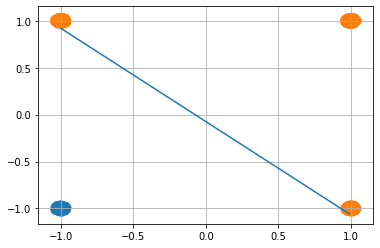

In [215]:
fig1 = plt.figure() 
x_x = ds_train[:,0]
x_y = ds_train[:,1]
x_color = np.where(x_x < 0, np.where(x_y < 0, 'C0', 'C1'), 'C1')
plt.grid()
plt.scatter(x_x, x_y, c = x_color)

x_recta = np.arange(-1, 1, 0.01)
recta = w[0]/w[2] - w[1]/w[2] * x_recta
plt.plot(x_recta, recta)

# Ejercicio 1: XOR

In [ ]:
ds_train = np.genfromtxt('icgtp1datos/OR_trn.csv', delimiter=',')
ds_train_size = ds_train.shape[0]

ds_test = np.genfromtxt('icgtp1datos/OR_tst.csv', delimiter=',')
ds_test_size = ds_test.shape[0]

# Ejercicio 2

In [240]:
def generar_particiones(filename, n, p_test):
    ds = np.genfromtxt(filename, delimiter=',')
    n_test = int(ds.shape[0] * p_test)
    n_train = ds.shape[0] - n_test
    M_test = np.zeros((n,n_test))
    M_train = np.zeros((n, n_train))

    for i in range(n):
        idx = np.arange(ds.shape[0])
        np.random.shuffle(idx)
        idx_test = idx[0:n_test]
        idx_train = idx[n_test:ds.shape[0]]
        M_test[i] = idx_test
        M_train[i] = idx_train
    
    return M_test, M_train

M_tst, M_trn = generar_particiones('icgtp1datos\spheres1d10.csv', 2, 0.2)
print(M_tst)
    

[[304. 490.  75. 893. 953. 557. 254. 816. 279. 783. 478. 986. 981. 398.
  466.   7. 657. 555. 564. 400. 331. 863. 362. 925. 373. 485. 527.  71.
  710. 543. 740. 391. 228. 293. 323.  99. 913.  63. 860. 382. 788. 388.
  449. 421. 194. 999. 915. 473. 849. 267. 408. 188. 886. 911. 606. 907.
  180.  48. 931. 275. 410. 240. 381. 429. 796.   1. 369. 725. 553. 738.
  335. 401. 174. 358. 186. 118. 389. 199. 259. 116. 622. 623. 771. 912.
  366. 989. 532. 380. 419. 273. 210. 773. 926. 820. 786. 447. 629. 523.
  547. 818. 720. 919. 370. 945. 705.  74. 585. 145. 444.  55. 474. 729.
  481. 803. 631. 689. 534. 457.  10. 994. 266. 499. 133. 384. 203. 152.
  235. 212. 840. 162. 918. 763. 101. 614. 602. 990. 756. 583. 147. 185.
  794. 671. 655. 367. 821. 285. 723. 403.  54. 663. 178. 121. 736. 313.
  525. 780. 161. 453. 338. 539.  22. 387. 385. 529. 650. 355. 853. 468.
    0. 667. 889. 824. 207. 356. 177. 545. 287. 365. 826. 807. 580. 843.
  932.  58. 641. 359. 562. 392. 936. 301. 173. 341. 569. 321. 36